###  Architecture of LSTM
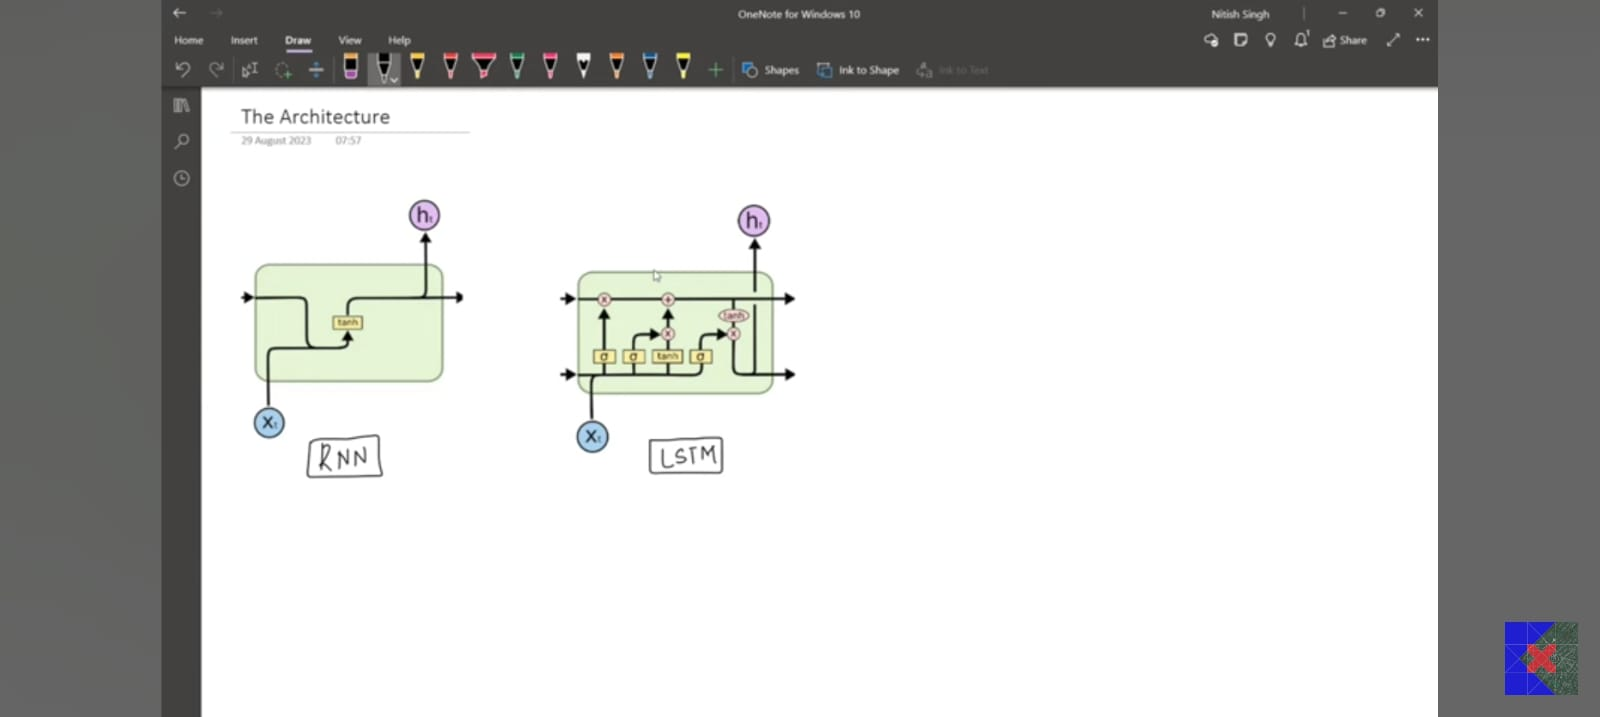
In LSTM
1. Long term memory -> Cell State (Long term context)
2. Short term memory -> Hidden State (Short term context)

You can consider LSTM as a computer where you give input and it will do some processing and you will get some output

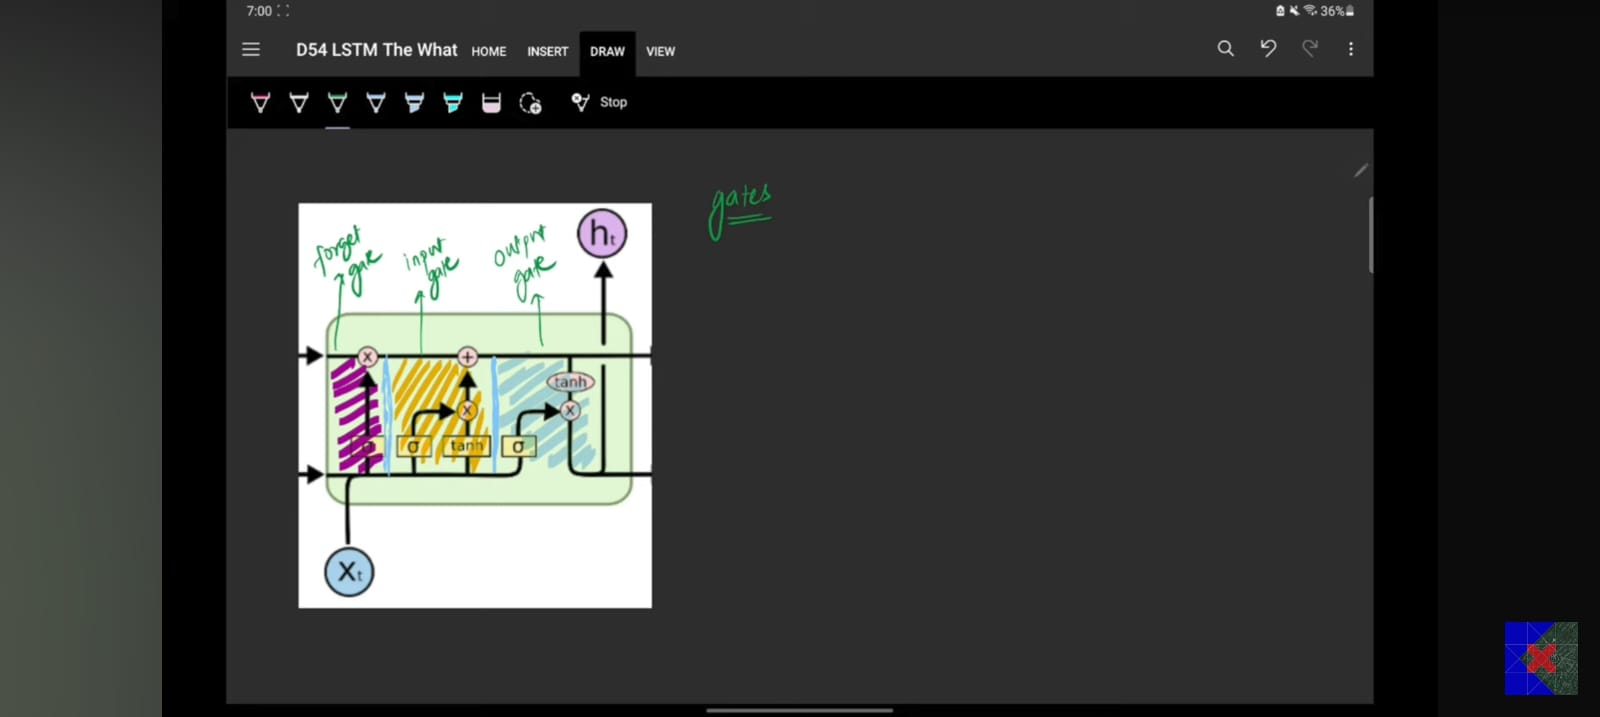
The input to the LSTM is
1. Previous Cell State (Long Term Memory)
2. Previous Hidden State (Short Term Memory)
3. Input for the current time stamp

The output from the LSTM is
1. Updated / Current Cell State (Updated Long term memory)
2. Updated / Current Hidden State (Updated short term memory)

What is actually happening in Processing in LSTM
1. You are updating the cell state
  - This task is done by Forget Gate and Input gate combined

    a. Based on current timestamp input update what to remove

    b. Based on current timestamp input update what in add

2. You are updating the hidden state

### Entire Architecture of LSTM is dependent on Gates and there are 3 gates in LSTMs

1. Forget Gate : To remove something from cell state
2. Input Gate : To add something to the cell state
3. Output Gate : To calculate hidden state for the next time step
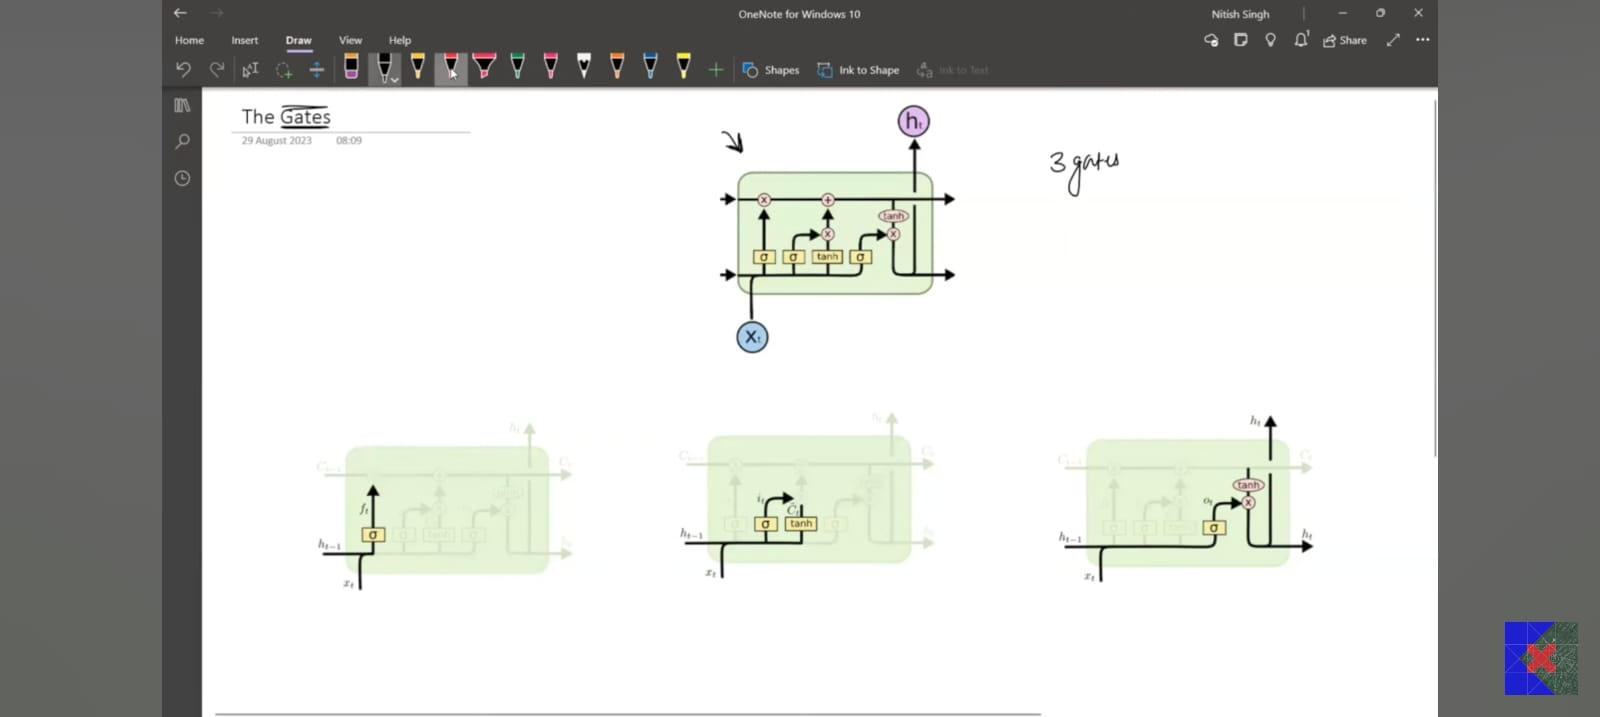

### What are C(t) and h(t) ?

Both of these are vectors and both have exactly equal dimensions

X(t) -> Input for current timestamp

This is also a vector and it is calculated by either integer encoding or embedding or using embedding layer

### What are f(t), i(t), C(t)` and O(t)

f(t) is in forget gate

i(t) and C(t)` (Candidate cell state) are in input gate

O(t) is in output gate

All of these vectors are of same dimensions f(t), i(t), C(t)`, O(t), C(t), h(t) which are also same as number no nodes in the neural network layers

### Pointwise Operations

Pointwise operation can happen only between those vector who have same dimensions

### Neural Network Layers

Each Yellow color box is a neural network layer and all the neural network will have same dimensions and the activation function may vary either sigmoid or tanh

How many nodes will be there in these neural network is a hyperparameter



### Forget Gate

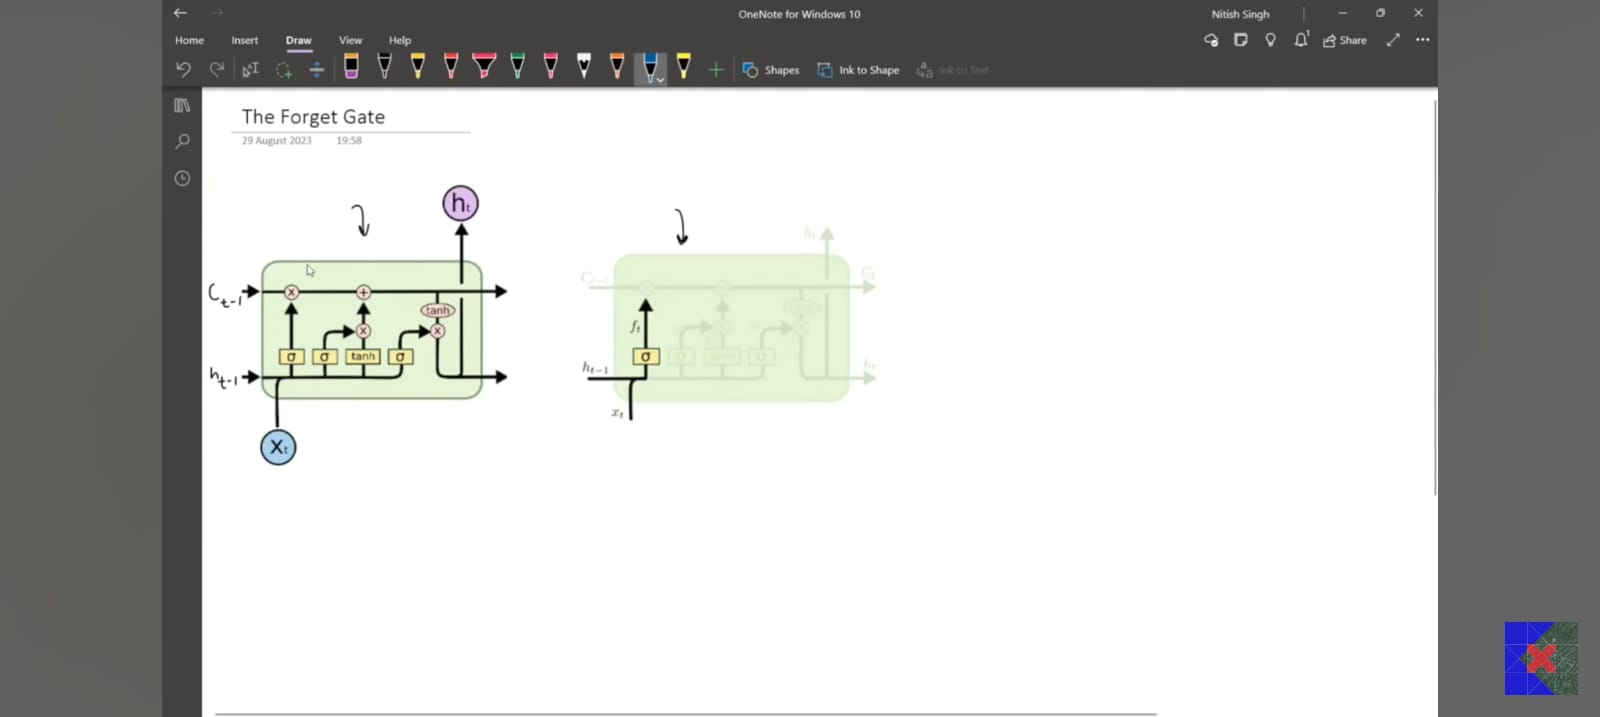
Input to the Forget gates are 3 as below :
1. X(t) -> Input for current timestep
2. h(t-1) -> Previous hidden state
3. C(t-1) -> Previous cell state

Output for the forget gate : You are able to remove certain things from your cell state which are not important for long term context

Neural network in forget gate will have same number of nodes as the dimensions of C(t-1) and h(t-1)

There are 2 stages in Forget Gate
1. Calculate the value of f(t)
2. Pointwise multiplication between f(t) and C(t-1) -> This step is which we call updating the cell state or removing things which are not useful for long term

In Stage 1 : There will be concatenation of h(t-1) and X(t) vectors and this concatenated vector `[h(t-1), X(t)]` will be given input to the neural network

In Stage 2 : There will be pointwise multiplication between f(t) and C(t-1)

### Input Gate
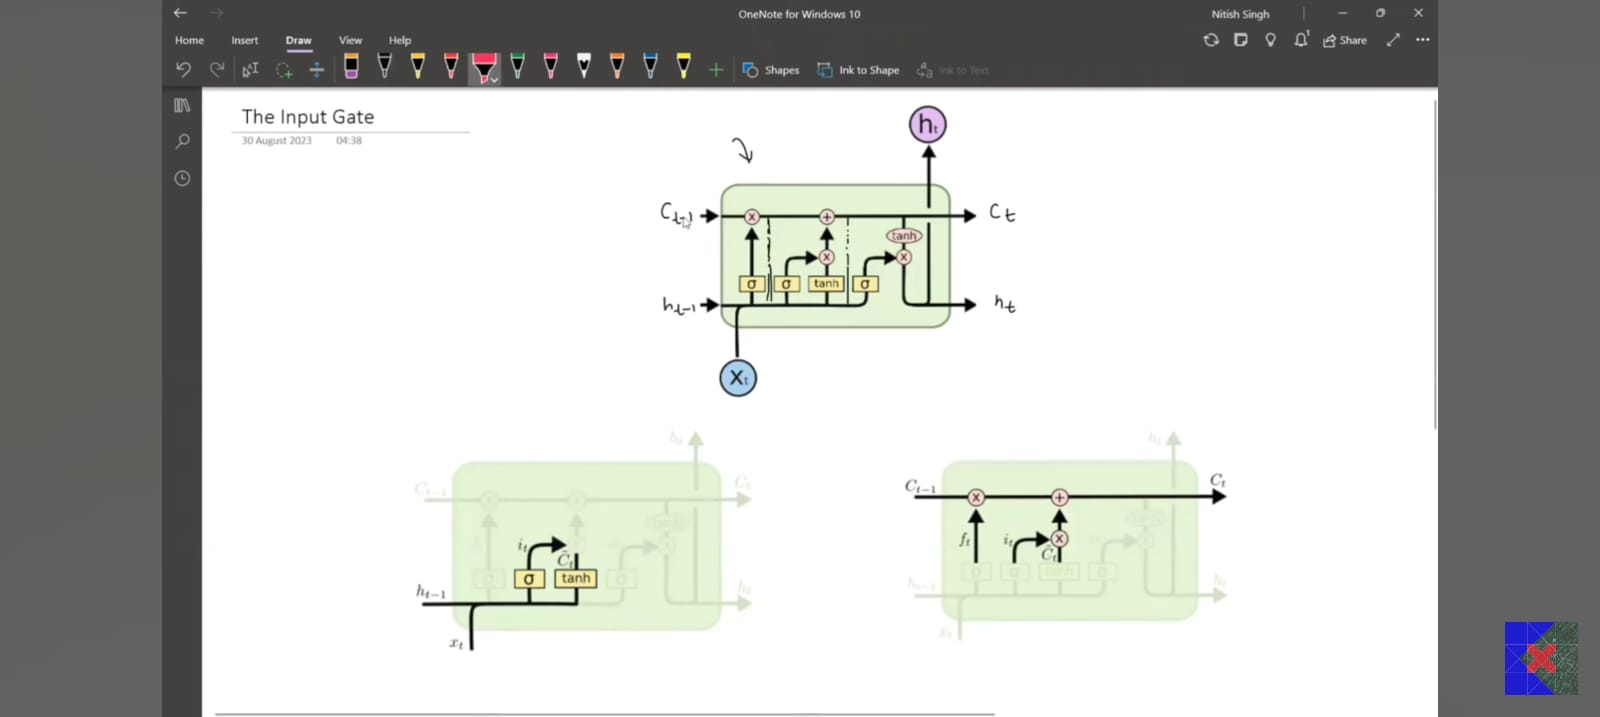
We use input gate because we want to add important information to the cell state

There are 3 stages in input gate
1. Calculate candidate cell state (C(t)`): Based on the previous hidden state and current timestep input we calculate candidates value to add in the cell state : This is the information our LSTM cell thinks is important

2. Calculate i(t) : This i(t) decides that from the candidate cell state what information to store in cell state

3. C(t) : Cell state calculation

In Stage 1 : We calculate potential important information also known as Candidate cell state, here we concatenate both the previous hidden state and current timestamp input and input this vector to the neural network and here the activation function is tanh

In Stage 2 : Here also the input is same and it is inputted to neural network and here the activation function is sigmoid

In Stage 3 : Here there will be pointwise multiplication between i(t) and C(t)' and we will get C(t)'' -> This is filtered candidate cell state and then we do pointwise addition between `f(t) * C(t-1) + i(t) * C(t)'' = C(t)` and we will get our final cell state

### Output Gate
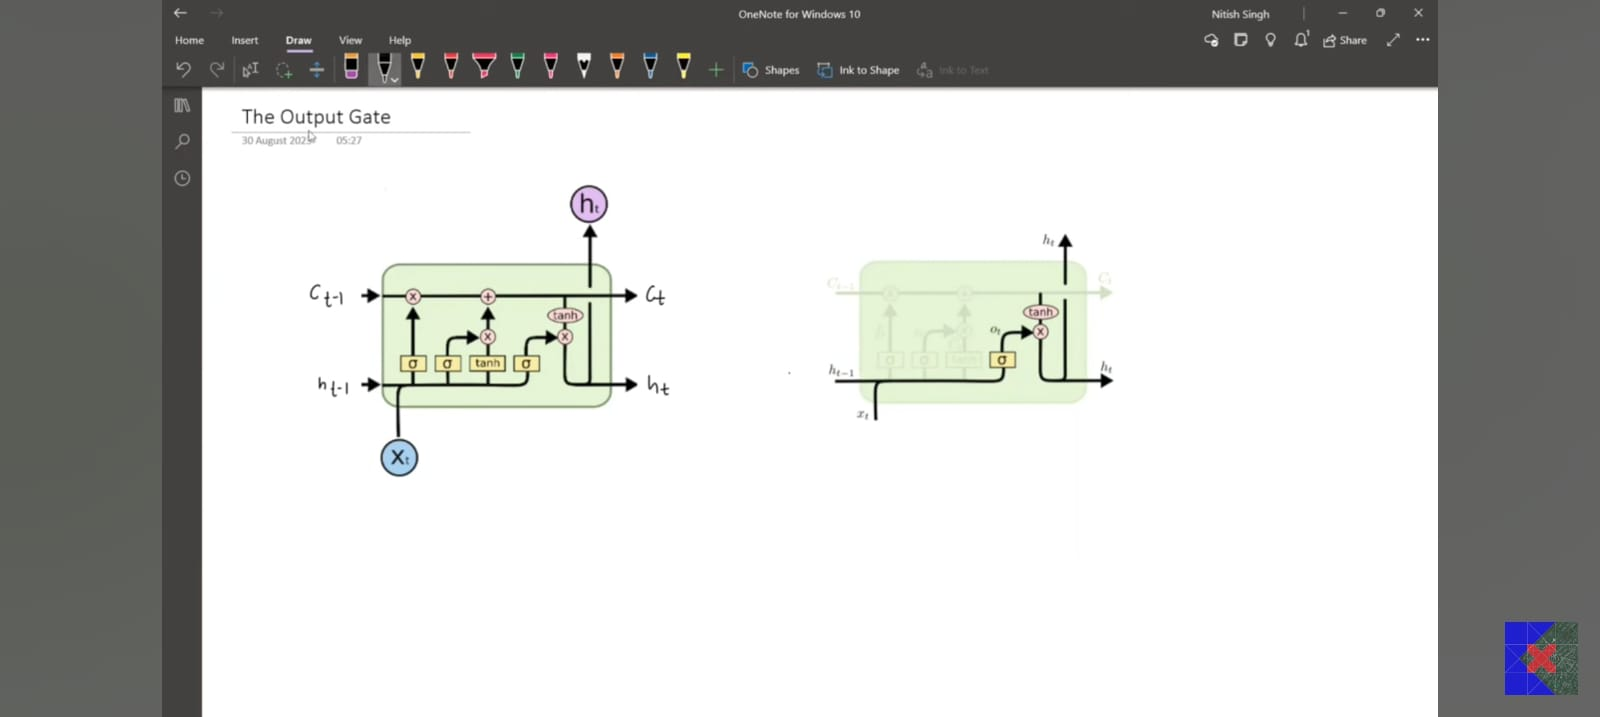
From the current Cell State we calculate current hidden state values

Input
1. Current time step input will be concatenated with previous hidden state will be send to neural network and we will get O(t) this will do pointwise multiplication between O(t) and tanh(C(t)) and we will get our current hidden state